In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [6]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

f = lambda x: int(x[1]>x[0])
def g(Z):
    return np.array([f(i) for i in Z])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = g(Z).reshape(xx.shape)
    plt.contour(xx, yy, Z, colors = 'k',linewidths = 1)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

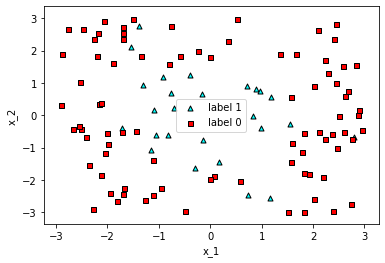

In [7]:
# Loading the one_circle dataset

df = pd.read_csv('one_circle.csv')
X = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
plot_points(X,y)

In [8]:
df[['x_1', 'x_2', 'y']]

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
...,...,...,...
105,-1.376637,2.778703,1
106,-0.703722,0.215382,1
107,0.729767,-2.479655,1
108,-1.715920,-0.393404,1


In [9]:
X[:10]

array([[-0.759416  ,  2.7532401 ],
       [-1.8852779 ,  1.62952654],
       [ 2.46330243, -1.02386888],
       [-1.98600415, -0.89880979],
       [ 2.01083403, -2.58011745],
       [ 2.41018752,  2.37050087],
       [ 1.59914005, -0.86273162],
       [-1.10985644, -2.46969746],
       [ 2.4473419 ,  2.81117994],
       [-1.69773161,  2.53984757]])

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# Categorizing the output

from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [12]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Training the model
model.fit(X, categorized_y, epochs=200, batch_size=10)

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5818
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7636
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7636
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7636
Epoch 5/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.7636
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7636
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7636
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7636
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7636
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.7636
Epoch 11/

11/11 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9091
Epoch 84/200
11/11 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.8909
Epoch 85/200
11/11 [==============================] - 0s 5ms/step - loss: 0.2135 - accuracy: 0.9364
Epoch 86/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8727
Epoch 87/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9364
Epoch 88/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2414 - accuracy: 0.9182
Epoch 89/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2138 - accuracy: 0.9091
Epoch 90/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9000
Epoch 91/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9091
Epoch 92/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9091
Epoch 93/200


11/11 [==============================] - 0s 2ms/step - loss: 0.2166 - accuracy: 0.8909
Epoch 165/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.9364
Epoch 166/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8727
Epoch 167/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9727
Epoch 168/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9182
Epoch 169/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 0.8909
Epoch 170/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9000
Epoch 171/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9091
Epoch 172/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9273
Epoch 173/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9091
Epoc

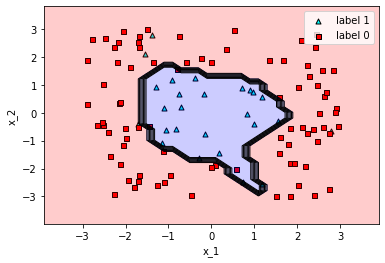

In [14]:
plot_model(X, y, model)